CRAWL DATA IN https://finance.vietstock.vn/ AND https://s.cafef.vn/du-lieu.chn with Selenium and Webdriver

In [31]:
!pip install selenium
!pip install webdriver-manager

from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager

import concurrent.futures
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import time 
from time import sleep
import csv
import os
from IPython.display import display
from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


def crawl_data(stock_id) get data from https://s.cafef.vn/du-lieu.chn

In [47]:
def crawl_data(stock_id):
    try:
        service = ChromeService(ChromeDriverManager().install())
        driver_auto = webdriver.Chrome(service=service)
        driver_auto.get("https://s.cafef.vn/lich-su-giao-dich-" +stock_id+ "-1.chn#data")
        driver_auto.implicitly_wait(5)
        stock = []
        date = []
        close = []
        change = []
        adjust = []
        GDKLKL = []
        GDKLGT = []
        GDTTKL = []
        GDTTGT = []
        open_price = []
        highest = []
        lowest = [] 
        
        # start_date = "01/03/2024"
        # end_date = "07/03/2024"
        
        start_date = "01/01/2013"
        end_date = "07/03/2024"
        
        start_date = datetime.strptime(start_date, "%d/%m/%Y")
        end_date = datetime.strptime(end_date, "%d/%m/%Y")
        
        while True:
            continue_crawling = True  # Flag to indicate whether to continue crawling
            for i in range(0,22):
                date_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[1]') 
                # for item in date_elements:
                #     print(item.text)
                close_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[2]') 
                # for item in close_elements:
                #     print(item.text)
                adjust_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[3]') 
                # for item in adjust_elements:
                #     print(item.text)
                change_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[4]')
                # for item in change_elements:
                #     print(item.text)
                GDKLKL_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[5]')    
                # for item in GDKLKL_elements:
                #     print(item.text)
                GDKLGT_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[6]')    
                # for item in GDKLGT_elements:
                #     print(item.text)
                GDTTKL_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[7]')    
                # for item in GDTTKL_elements:
                #     print(item.text)
                GDTTGT_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[8]')    
                # for item in GDTTGT_elements:
                #     print(item.text)
                open_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[9]')    
                # for item in open_elements:
                #     print(item.text)
                highest_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[10]')    
                # for item in highest_elements:
                #     print(item.text)
                lowest_elements = driver_auto.find_elements(By.XPATH, '//*[@id="render-table-owner"]/tr['+str(i)+']/td[11]')
                # for item in lowest_elements:
                #     print(item.text)
        
                # Check if elements exist before accessing them
                if date_elements and close_elements and change_elements and adjust_elements and GDKLKL_elements \
                        and GDKLGT_elements and GDTTKL_elements and GDTTGT_elements and open_elements and highest_elements and lowest_elements:
                    stock.append(stock_id)
                    # Check if the current date is within the desired range
                    current_date = datetime.strptime(date_elements[0].text, "%d/%m/%Y")
                    if start_date <= current_date <= end_date:
                        date.append(date_elements[0].text)
                        close.append(close_elements[0].text)
                        adjust.append(adjust_elements[0].text)
                        change.append(change_elements[0].text)
                        GDKLKL.append(GDKLKL_elements[0].text)
                        GDKLGT.append(GDKLGT_elements[0].text)
                        GDTTKL.append(GDTTKL_elements[0].text)
                        GDTTGT.append(GDTTGT_elements[0].text)
                        open_price.append(open_elements[0].text)
                        highest.append(highest_elements[0].text)
                        lowest.append(lowest_elements[0].text)
                        print(f"Data for {current_date} added.")
                    else:
                        print(f"Data for {current_date} is outside the desired range. Stopping the crawling.")
                        continue_crawling = False
                        break
                else:
                    print(f"Elements not found for iteration {i}")   
            if not continue_crawling:
                break  # Break out of the outer loop if continue_crawling is False  
            
            time.sleep(1)
            next_button = driver_auto.find_element(By.XPATH, '//*[@id="divStart"]/div/div[3]/div[3]')      
            ActionChains(driver_auto).move_to_element(next_button).perform() 
            next_button.click()
            time.sleep(3)
            
        
        # if current_date == end_date:
        # Thay đổi đường dẫn để lưu tệp vào một thư mục cụ thể
        directory = r"D:\DACNTT - Stock Price Prediction"
        filename = os.path.join(directory, f"{stock_id}.csv")
        print(f"Đang lưu dữ liệu vào: {directory}")
        print(f"Tên tệp: {filename}")
        if not os.path.exists(directory):
            os.makedirs(directory)
        
        # Ensure all lists have the same length
        min_length = min(len(stock), len(date), len(close), len(change), len(adjust), len(GDKLKL),
                    len(GDKLGT), len(GDTTKL), len(GDTTGT), len(open_price), len(highest), len(lowest))
        
        # Check and pad lists to ensure equal length
        stock = stock[:min_length]
        date = date[:min_length]
        close = close[:min_length]
        change = change[:min_length]
        adjust = adjust[:min_length]
        GDKLKL = GDKLKL[:min_length]
        GDKLGT = GDKLGT[:min_length]
        GDTTKL = GDTTKL[:min_length]
        GDTTGT = GDTTGT[:min_length]
        open_price = open_price[:min_length]
        highest = highest[:min_length]
        lowest = lowest[:min_length]
                    
        attribute_df = {"Mã cổ phiếu": stock,
                "Ngày giao dịch": date,
                "Giá đóng cửa": close,
                "Giá điều chỉnh": adjust,
                "Thay đổi": change,
                "GDKL_KL": GDKLKL,
                "GDKL_GT": GDKLGT,
                "GDTT_KL": GDTTKL,
                "GDTT_GT": GDTTGT,
                "Giá mở cửa": open_price,
                "Giá cao nhất": highest,
                "Giá thấp nhất": lowest
                }
        df = pd.DataFrame(attribute_df)
        display(df)
        df.to_csv(filename, index=False, encoding='utf-8') 
        print(f"Tạo tệp {filename} thành công.")
        driver_auto.quit()
    except Exception as e:
        print(f"Có lỗi xảy ra khi crawl dữ liệu cho {stock_id}: {e}")
    finally:
        if 'driver_auto' in locals():
            driver_auto.quit()

In [48]:
stocks_id = ['FPT','HPG','MBB']
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(crawl_data, stocks_id)

Elements not found for iteration 0
Data for 2024-03-07 00:00:00 added.
Elements not found for iteration 0
Data for 2024-03-06 00:00:00 added.
Data for 2024-03-07 00:00:00 added.
Data for 2024-03-05 00:00:00 added.
Data for 2024-03-06 00:00:00 added.
Data for 2024-03-04 00:00:00 added.
Elements not found for iteration 0
Data for 2024-03-05 00:00:00 added.
Data for 2024-03-01 00:00:00 added.
Data for 2024-03-07 00:00:00 added.
Data for 2024-03-04 00:00:00 added.
Data for 2024-02-29 00:00:00 added.
Data for 2024-03-06 00:00:00 added.
Data for 2024-03-01 00:00:00 added.
Data for 2024-02-28 00:00:00 added.
Data for 2024-03-05 00:00:00 added.
Data for 2024-02-29 00:00:00 added.
Data for 2024-03-04 00:00:00 added.Data for 2024-02-27 00:00:00 added.

Data for 2024-02-28 00:00:00 added.
Data for 2024-03-01 00:00:00 added.
Data for 2024-02-26 00:00:00 added.
Data for 2024-02-27 00:00:00 added.
Data for 2024-02-29 00:00:00 added.Data for 2024-02-23 00:00:00 added.

Data for 2024-02-26 00:00:00 ad

Mã cổ phiếu Ngày giao dịch Giá đóng cửa Giá điều chỉnh        Thay đổi  \
0            HPG     07/03/2024           31             --     0.2(0.65 %)   
1            HPG     06/03/2024         30.6             --  -0.55(-1.77 %)   
2            HPG     05/03/2024        31.15             --    0.35(1.14 %)   
3            HPG     04/03/2024         30.8             --  -0.05(-0.16 %)   
4            HPG     01/03/2024        30.85             --  -0.15(-0.48 %)   
...          ...            ...          ...            ...             ...   
2781         HPG     08/01/2013         24.1           1.69       1(4.33 %)   
2782         HPG     07/01/2013         23.1           1.62     1.1(5.00 %)   
2783         HPG     04/01/2013           22           1.54     0.7(3.29 %)   
2784         HPG     03/01/2013         21.3            1.5     0.2(0.95 %)   
2785         HPG     02/01/2013         21.1           1.48     0.1(0.48 %)   

         GDKL_KL GDKL_GT    GDTT_KL GDTT_GT Giá mở cửa Giá cao nhất  \
0     32,262,200  998.17  1,133,839   33.22       30.7        31.35   
1     20,347,800  627.08  3,204,000   96.12       31.1        31.15   
2     29,917,200  927.56    306,801    9.33       30.8         31.3   
3     28,579,500  886.73    389,576   11.57         31         31.4   
4     26,958,700  832.09    480,000   14.71       31.2         31.2   
...          ...     ...        ...     ...        ...          ...   
2781   1,480,180   35.71     85,000    2.05         24         24.2   
2782     926,020   20.65          0       0       21.2         23.1   
2783     569,620   12.46          0       0       21.4         22.3   
2784     720,080   15.14          0       0         21         21.3   
2785     541,540   11.37          0       0         21         21.2   

     Giá thấp nhất  
0             30.6  
1            30.55  
2             30.7  
3             30.7  
4            30.65  
...            ...  
2781          23.7  
2782          21.2  
2783          21.2  
2784          20.8  
2785          20.8  

[2786 rows x 12 columns]

Tạo tệp D:\DACNTT - Stock Price Prediction\HPG.csv thành công.
Elements not found for iteration 0
Data for 2013-01-10 00:00:00 added.
Data for 2013-01-09 00:00:00 added.
Data for 2013-01-08 00:00:00 added.
Data for 2013-01-07 00:00:00 added.
Data for 2013-01-04 00:00:00 added.
Data for 2013-01-03 00:00:00 added.
Data for 2013-01-02 00:00:00 added.
Data for 2012-12-28 00:00:00 is outside the desired range. Stopping the crawling.
Đang lưu dữ liệu vào: D:\DACNTT - Stock Price Prediction
Tên tệp: D:\DACNTT - Stock Price Prediction\MBB.csv


Mã cổ phiếu Ngày giao dịch Giá đóng cửa Giá điều chỉnh        Thay đổi  \
0            MBB     07/03/2024         24.4             --   -0.2(-0.81 %)   
1            MBB     06/03/2024         24.6             --       0(0.00 %)   
2            MBB     05/03/2024         24.6             --     0.4(1.65 %)   
3            MBB     04/03/2024         24.2             --     0.2(0.83 %)   
4            MBB     01/03/2024           24             --  -0.15(-0.62 %)   
...          ...            ...          ...            ...             ...   
2782         MBB     08/01/2013         13.6           3.43     0.5(3.82 %)   
2783         MBB     07/01/2013         13.1            3.3     0.1(0.77 %)   
2784         MBB     04/01/2013           13           3.28     0.1(0.78 %)   
2785         MBB     03/01/2013         12.9           3.25   -0.2(-1.53 %)   
2786         MBB     02/01/2013         13.1            3.3     0.6(4.80 %)   

         GDKL_KL GDKL_GT    GDTT_KL GDTT_GT Giá mở cửa Giá cao nhất  \
0     19,759,000  484.77  6,257,890  164.36       24.7         24.8   
1     21,911,700  544.82    200,000    5.26       24.6        25.15   
2     22,768,900  553.87  6,000,001   155.1       24.2        24.65   
3     31,949,800  769.75  5,122,301  131.39       24.1        24.45   
4     20,474,600   490.8  6,446,500  166.32       24.1        24.15   
...          ...     ...        ...     ...        ...          ...   
2782   5,318,350   71.55    663,850    8.93         13         13.7   
2783   1,625,590   21.25          0       0         13         13.2   
2784   1,401,390   18.14          0       0       12.9         13.1   
2785   2,020,300   26.11          0       0       13.2         13.2   
2786   3,467,810   44.87          0       0       12.6         13.1   

     Giá thấp nhất  
0            24.35  
1             24.5  
2             24.1  
3            23.75  
4             23.8  
...            ...  
2782            13  
2783          12.9  
2784          12.7  
2785          12.7  
2786          12.6  

[2787 rows x 12 columns]

Tạo tệp D:\DACNTT - Stock Price Prediction\MBB.csv thành công.
Elements not found for iteration 0
Data for 2013-01-09 00:00:00 added.
Data for 2013-01-08 00:00:00 added.
Data for 2013-01-07 00:00:00 added.
Data for 2013-01-04 00:00:00 added.
Data for 2013-01-03 00:00:00 added.
Data for 2013-01-02 00:00:00 added.
Data for 2012-12-28 00:00:00 is outside the desired range. Stopping the crawling.
Đang lưu dữ liệu vào: D:\DACNTT - Stock Price Prediction
Tên tệp: D:\DACNTT - Stock Price Prediction\FPT.csv


Mã cổ phiếu Ngày giao dịch Giá đóng cửa Giá điều chỉnh       Thay đổi  \
0            FPT     07/03/2024        111.3             --    2.2(2.02 %)   
1            FPT     06/03/2024          109             --  -1.7(-1.54 %)   
2            FPT     05/03/2024        110.7             --  -0.7(-0.63 %)   
3            FPT     04/03/2024        111.4             --    0.6(0.54 %)   
4            FPT     01/03/2024        110.8             --    1.8(1.65 %)   
...          ...            ...          ...            ...            ...   
2781         FPT     08/01/2013           38           5.83    1.8(4.97 %)   
2782         FPT     07/01/2013         36.2           5.55  -0.2(-0.55 %)   
2783         FPT     04/01/2013         36.4           5.58    0.5(1.39 %)   
2784         FPT     03/01/2013         35.9           5.51  -0.5(-1.37 %)   
2785         FPT     02/01/2013         36.4           5.58    1.2(3.41 %)   

        GDKL_KL GDKL_GT    GDTT_KL GDTT_GT Giá mở cửa Giá cao nhất  \
0     4,037,600  445.72  1,212,150  137.11      109.1        113.9   
1     2,491,100  273.05    185,700   21.46        110        110.4   
2     3,383,000  373.77  1,328,118   157.6      111.4        111.4   
3     3,087,100  343.32     74,500    8.83        111        111.8   
4     4,019,400  445.12    942,000  106.08      109.2        111.4   
...         ...     ...        ...     ...        ...          ...   
2781    535,860   20.03          0       0       36.3           38   
2782    204,570    7.42          0       0       36.2         36.5   
2783    278,020   10.01          0       0       35.7         36.4   
2784    366,960   13.23     20,000    0.76       36.4         36.6   
2785    380,320   13.75          0       0       35.3         36.6   

     Giá thấp nhất  
0            108.2  
1            108.7  
2            109.9  
3            110.8  
4            109.1  
...            ...  
2781          36.2  
2782            36  
2783          35.6  
2784          35.3  
2785          35.3  

[2786 rows x 12 columns]

Tạo tệp D:\DACNTT - Stock Price Prediction\FPT.csv thành công.


def crawl_financial_index get data from https://finance.vietstock.vn/

In [89]:
def crawl_financial_index(stock_id):
    try:
        service = ChromeService(ChromeDriverManager().install())
        driver_auto = webdriver.Chrome(service=service)
        driver_auto.get("https://finance.vietstock.vn/" + stock_id + "/tai-chinh.htm?tab=BCTT")
        driver_auto.implicitly_wait(5)

        Quarters = []
        PE = []
        PB = []
        target_date_str = 'Q4/2012'
        target_date = datetime.strptime(target_date_str, 'Q%m/%Y')
        while True:
            continue_crawling = True  # Flag to indicate whether to continue crawling
            for i in range(9, 4, -1):
                quarters = driver_auto.find_elements(By.XPATH, '//*[@id="tbl-data-BCTT-CSTC"]/thead/tr/th[' + str(i) + ']')
                # for item in quarters:
                #     print(item.text)
                P_E = driver_auto.find_elements(By.XPATH, '//*[@id="tbl-data-BCTT-CSTC"]/tbody/tr[9]/td[' + str(i) + ']')
                # for item in P_E:
                #     print(item.text)
                P_B = driver_auto.find_elements(By.XPATH, '//*[@id="tbl-data-BCTT-CSTC"]/tbody/tr[10]/td[' + str(i) + ']')
                # for item in P_B:
                #     print(item.text)
                if quarters and P_E and P_B:
                    current_quarter = quarters[0].text
                    current_date = datetime.strptime(current_quarter, 'Q%m/%Y')
                    if current_date <= target_date:
                        print(f"Data for {current_quarter} is outside the desired range. Skipping...")
                        continue_crawling = False
                        break
                    else:
                        Quarters.append(current_quarter)
                        PE.append(P_E[0].text)
                        PB.append(P_B[0].text)
                        print(f"Data for {current_quarter} added.")
                else:
                    print(f"Elements not found for iteration {i}")   
            if not continue_crawling:
                break  # Break out of the outer loop if continue_crawling is False      
                   

            time.sleep(1)
            next_button = driver_auto.find_element(By.XPATH,
                                                    '//*[@id="finance-content"]/div/div/div[2]/div/div[1]/div[2]')
            ActionChains(driver_auto).move_to_element(next_button).perform()
            next_button.click()
            time.sleep(3)

        directory = r"D:\DACNTT - Stock Price Prediction"
        filename = os.path.join(directory, f"Financial index - {stock_id}.csv")
        print(f"Đang lưu dữ liệu vào: {directory}")
        print(f"Tên tệp: {filename}")

        if not os.path.exists(directory):
            os.makedirs(directory)

        attribute_df = {"Mã cổ phiếu": stock_id,
                        "Chỉ số tài chính theo quý": Quarters,
                        "Chỉ số giá thị trường trên thu nhập (P/E)": PE,
                        "Chỉ số giá thị trường trên giá trị sổ sách (P/B)": PB
                        }

        df = pd.DataFrame(attribute_df)
        display(df)
        df.to_csv(filename, index=False, encoding='utf-8')

        print(f"Tạo tệp {filename} thành công.")

    except Exception as e:
        print(f"Có lỗi xảy ra khi crawl dữ liệu cho {stock_id}: {e}")
    finally:
        if 'driver_auto' in locals():
            driver_auto.quit()

In [90]:
stocks_id = ['FPT','HPG','MBB']
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(crawl_financial_index, stocks_id)

Data for Q4/2023 added.
Data for Q4/2023 added.
Data for Q3/2023 added.
Data for Q2/2023 added.
Data for Q1/2023 added.
Data for Q4/2022 added.
Data for Q3/2023 added.
Data for Q2/2023 added.
Data for Q1/2023 added.
Data for Q4/2022 added.
Data for Q3/2022 added.
Data for Q2/2022 added.
Data for Q1/2022 added.
Data for Q4/2021 added.
Data for Q3/2021 added.
Data for Q3/2022 added.
Data for Q2/2022 added.
Data for Q1/2022 added.
Data for Q4/2021 added.
Data for Q3/2021 added.
Data for Q2/2021 added.
Data for Q1/2021 added.
Data for Q4/2020 added.
Data for Q3/2020 added.
Data for Q2/2020 added.
Data for Q2/2021 added.
Data for Q1/2021 added.
Data for Q4/2020 added.
Data for Q3/2020 added.
Data for Q2/2020 added.
Data for Q1/2020 added.
Data for Q4/2019 added.
Data for Q3/2019 added.
Data for Q2/2019 added.
Data for Q1/2019 added.
Data for Q1/2020 added.
Data for Q4/2019 added.
Data for Q4/2023 added.
Data for Q3/2019 added.
Data for Q2/2019 added.
Data for Q3/2023 added.
Data for Q1/2019

Mã cổ phiếu Chỉ số tài chính theo quý  \
0          HPG                   Q4/2023   
1          HPG                   Q3/2023   
2          HPG                   Q2/2023   
3          HPG                   Q1/2023   
4          HPG                   Q4/2022   
5          HPG                   Q3/2022   
6          HPG                   Q2/2022   
7          HPG                   Q1/2022   
8          HPG                   Q4/2021   
9          HPG                   Q3/2021   
10         HPG                   Q2/2021   
11         HPG                   Q1/2021   
12         HPG                   Q4/2020   
13         HPG                   Q3/2020   
14         HPG                   Q2/2020   
15         HPG                   Q1/2020   
16         HPG                   Q4/2019   
17         HPG                   Q3/2019   
18         HPG                   Q2/2019   
19         HPG                   Q1/2019   
20         HPG                   Q4/2018   
21         HPG                   Q3/2018   
22         HPG                   Q2/2018   
23         HPG                   Q1/2018   
24         HPG                   Q4/2017   
25         HPG                   Q3/2017   
26         HPG                   Q2/2017   
27         HPG                   Q1/2017   
28         HPG                   Q4/2016   
29         HPG                   Q3/2016   
30         HPG                   Q2/2016   
31         HPG                   Q1/2016   
32         HPG                   Q4/2015   
33         HPG                   Q3/2015   
34         HPG                   Q2/2015   
35         HPG                   Q1/2015   
36         HPG                   Q4/2014   
37         HPG                   Q3/2014   
38         HPG                   Q2/2014   
39         HPG                   Q1/2014   
40         HPG                   Q4/2013   
41         HPG                   Q3/2013   
42         HPG                   Q2/2013   
43         HPG                   Q1/2013   

   Chỉ số giá thị trường trên thu nhập (P/E)  \
0                                      23.78   
1                                      81.75   
2                                     -79.69   
3                                     172.22   
4                                         11   
5                                       5.72   
6                                       3.33   
7                                       5.38   
8                                       5.38   
9                                       6.16   
10                                      6.83   
11                                      8.04   
12                                      9.21   
13                                         7   
14                                      8.51   
15                                      5.56   
16                                      7.79   
17                                      6.93   
18                                      6.33   
19                                      7.82   
20                                      6.65   
21                                      7.74   
22                                       6.4   
23                                      10.1   
24                                      7.18   
25                                      5.42   
26                                      4.06   
27                                      3.22   
28                                         5   
29                                      6.45   
30                                      6.25   
31                                      5.22   
32                                      5.24   
33                                         5   
34                                      4.42   
35                                      7.13   
36                                      7.72   
37                                      8.03   
38                                       8.2   
39                                      9.38   
40                                      8.81   
41    

Tạo tệp D:\DACNTT - Stock Price Prediction\Financial index - HPG.csv thành công.
Data for Q4/2013 added.
Data for Q3/2013 added.
Data for Q2/2013 added.
Data for Q1/2013 added.
Data for Q4/2012 is outside the desired range. Skipping...
Đang lưu dữ liệu vào: D:\DACNTT - Stock Price Prediction
Tên tệp: D:\DACNTT - Stock Price Prediction\Financial index - MBB.csv


Mã cổ phiếu Chỉ số tài chính theo quý  \
0          MBB                   Q4/2023   
1          MBB                   Q3/2023   
2          MBB                   Q2/2023   
3          MBB                   Q1/2023   
4          MBB                   Q4/2022   
5          MBB                   Q3/2022   
6          MBB                   Q2/2022   
7          MBB                   Q1/2022   
8          MBB                   Q4/2021   
9          MBB                   Q3/2021   
10         MBB                   Q2/2021   
11         MBB                   Q1/2021   
12         MBB                   Q4/2020   
13         MBB                   Q3/2020   
14         MBB                   Q2/2020   
15         MBB                   Q1/2020   
16         MBB                   Q4/2019   
17         MBB                   Q3/2019   
18         MBB                   Q2/2019   
19         MBB                   Q1/2019   
20         MBB                   Q4/2018   
21         MBB                   Q3/2018   
22         MBB                   Q2/2018   
23         MBB                   Q1/2018   
24         MBB                   Q4/2017   
25         MBB                   Q3/2017   
26         MBB                   Q2/2017   
27         MBB                   Q1/2017   
28         MBB                   Q4/2016   
29         MBB                   Q3/2016   
30         MBB                   Q2/2016   
31         MBB                   Q1/2016   
32         MBB                   Q4/2015   
33         MBB                   Q3/2015   
34         MBB                   Q2/2015   
35         MBB                   Q1/2015   
36         MBB                   Q4/2014   
37         MBB                   Q3/2014   
38         MBB                   Q2/2014   
39         MBB                   Q1/2014   
40         MBB                   Q4/2013   
41         MBB                   Q3/2013   
42         MBB                   Q2/2013   
43         MBB                   Q1/2013   

   Chỉ số giá thị trường trên thu nhập (P/E)  \
0                                       4.37   
1                                       4.52   
2                                       4.88   
3                                       4.28   
4                                       3.95   
5                                       4.37   
6                                       5.73   
7                                       8.38   
8                                        7.4   
9                                       7.46   
10                                     11.12   
11                                       7.2   
12                                      6.91   
13                                      5.72   
14                                      4.74   
15                                      3.95   
16                                      5.76   
17                                       6.6   
18                                      6.42   
19                                      6.99   
20                                      6.21   
21                                      8.51   
22                                      10.3   
23                                     14.68   
24                                      12.6   
25                                      9.53   
26                                     10.96   
27                                      8.16   
28                                      7.79   
29                                       8.9   
30                                      8.62   
31                                      7.64   
32                                      7.47   
33                                      6.78   
34                                      6.73   
35                                      6.34   
36                                         6   
37                                      6.47   
38                                      6.73   
39                                      7.54   
40                                      5.92   
41    

Tạo tệp D:\DACNTT - Stock Price Prediction\Financial index - MBB.csv thành công.
Data for Q3/2017 added.
Data for Q2/2017 added.
Data for Q1/2017 added.
Data for Q4/2016 added.
Data for Q3/2016 added.
Data for Q2/2016 added.
Data for Q1/2016 added.
Data for Q4/2015 added.
Data for Q3/2015 added.
Data for Q2/2015 added.
Data for Q1/2015 added.
Data for Q4/2014 added.
Data for Q3/2014 added.
Data for Q2/2014 added.
Data for Q1/2014 added.
Data for Q4/2013 added.
Data for Q3/2013 added.
Data for Q2/2013 added.
Data for Q1/2013 added.
Data for Q4/2012 is outside the desired range. Skipping...
Đang lưu dữ liệu vào: D:\DACNTT - Stock Price Prediction
Tên tệp: D:\DACNTT - Stock Price Prediction\Financial index - FPT.csv


Mã cổ phiếu Chỉ số tài chính theo quý  \
0          FPT                   Q4/2023   
1          FPT                   Q3/2023   
2          FPT                   Q2/2023   
3          FPT                   Q1/2023   
4          FPT                   Q4/2022   
5          FPT                   Q3/2022   
6          FPT                   Q2/2022   
7          FPT                   Q1/2022   
8          FPT                   Q4/2021   
9          FPT                   Q3/2021   
10         FPT                   Q2/2021   
11         FPT                   Q1/2021   
12         FPT                   Q4/2020   
13         FPT                   Q3/2020   
14         FPT                   Q2/2020   
15         FPT                   Q1/2020   
16         FPT                   Q4/2019   
17         FPT                   Q3/2019   
18         FPT                   Q2/2019   
19         FPT                   Q1/2019   
20         FPT                   Q4/2018   
21         FPT                   Q3/2018   
22         FPT                   Q2/2018   
23         FPT                   Q1/2018   
24         FPT                   Q4/2017   
25         FPT                   Q3/2017   
26         FPT                   Q2/2017   
27         FPT                   Q1/2017   
28         FPT                   Q4/2016   
29         FPT                   Q3/2016   
30         FPT                   Q2/2016   
31         FPT                   Q1/2016   
32         FPT                   Q4/2015   
33         FPT                   Q3/2015   
34         FPT                   Q2/2015   
35         FPT                   Q1/2015   
36         FPT                   Q4/2014   
37         FPT                   Q3/2014   
38         FPT                   Q2/2014   
39         FPT                   Q1/2014   
40         FPT                   Q4/2013   
41         FPT                   Q3/2013   
42         FPT                   Q2/2013   
43         FPT                   Q1/2013   

   Chỉ số giá thị trường trên thu nhập (P/E)  \
0                                      17.55   
1                                      17.31   
2                                      16.26   
3                                      15.04   
4                                      14.68   
5                                      14.76   
6                                      16.01   
7                                       20.3   
8                                      18.38   
9                                      19.09   
10                                     18.26   
11                                     16.19   
12                                     12.46   
13                                     10.84   
14                                      9.43   
15                                      8.44   
16                                     12.15   
17                                     11.61   
18                                      9.63   
19                                      9.98   
20                                      9.36   
21                                      7.96   
22                                      7.17   
23                                     10.31   
24                                      9.69   
25                                     10.75   
26                                     10.47   
27                                     12.67   
28                                     11.88   
29                                     12.11   
30                                     10.96   
31                                      9.73   
32                                      9.26   
33                                      9.22   
34                                      9.28   
35                                      9.41   
36                                      9.16   
37                                      9.21   
38                                      8.03   
39                                     11.84   
40                                      8.04   
41    

Tạo tệp D:\DACNTT - Stock Price Prediction\Financial index - FPT.csv thành công.


DATA CLEANING

In [4]:
import pandas as pd
import numpy as np
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly

# Candlestick
import plotly.graph_objs as go
import plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
Data_FPT = pd.read_csv('D:\DACNTT - Stock Price Prediction/FPT.csv')
# Data_FPT.head()
Data_FPT_Financial_index = pd.read_csv('D:\DACNTT - Stock Price Prediction/Financial index - FPT.csv')
# Data_FPT_Financial_index.head()

Data_HPG = pd.read_csv('D:\DACNTT - Stock Price Prediction/HPG.csv')
# Data_HPG.head()
Data_HPG_Financial_index = pd.read_csv('D:\DACNTT - Stock Price Prediction/Financial index - HPG.csv')
# Data_HPG_Financial_index.head()

Data_MBB = pd.read_csv('D:\DACNTT - Stock Price Prediction/MBB.csv')
# Data_MBB.head()
Data_MBB_Financial_index = pd.read_csv('D:\DACNTT - Stock Price Prediction/Financial index - MBB.csv')
# Data_MBB_Financial_index.head()

In [6]:
df_FPT = pd.DataFrame(Data_FPT)
df_FPT_Financial_index = pd.DataFrame(Data_FPT_Financial_index)

df_HPG = pd.DataFrame(Data_HPG)
df_HPG_Financial_index = pd.DataFrame(Data_HPG_Financial_index)

df_MBB = pd.DataFrame(Data_MBB)
df_MBB_Financial_index = pd.DataFrame(Data_MBB_Financial_index)

In [7]:
rows, col = df_FPT.shape
print ("Dimensions of dataset FPT.csv: {}" . format (df_FPT.shape))
print ('Rows:', rows, '\nColumns:', col)
rows, col = df_FPT_Financial_index.shape
print ("Dimensions of dataset Financial index - FPT.csv : {}" . format (df_FPT_Financial_index.shape))
print ('Rows:', rows, '\nColumns:', col)

rows, col = df_HPG.shape
print ("Dimensions of dataset HPG.csv: {}" . format (df_HPG.shape))
print ('Rows:', rows, '\nColumns:', col)
rows, col = df_HPG_Financial_index.shape
print ("Dimensions of dataset Financial index - HPG.csv: {}" . format (df_HPG_Financial_index.shape))
print ('Rows:', rows, '\nColumns:', col)


rows, col = df_MBB.shape
print ("Dimensions of dataset MBB.csv: {}" . format (df_MBB.shape))
print ('Rows:', rows, '\nColumns:', col)
rows, col = df_MBB_Financial_index.shape
print ("Dimensions of dataset Financial index - MBB.csv: {}" . format (df_MBB_Financial_index.shape))
print ('Rows:', rows, '\nColumns:', col)



Dimensions of dataset FPT.csv: (2786, 12)
Rows: 2786 
Columns: 12
Dimensions of dataset Financial index - FPT.csv : (44, 4)
Rows: 44 
Columns: 4
Dimensions of dataset HPG.csv: (2786, 12)
Rows: 2786 
Columns: 12
Dimensions of dataset Financial index - HPG.csv: (44, 4)
Rows: 44 
Columns: 4
Dimensions of dataset MBB.csv: (2787, 12)
Rows: 2787 
Columns: 12
Dimensions of dataset Financial index - MBB.csv: (44, 4)
Rows: 44 
Columns: 4


In [8]:
# checking data types of columns
print(Data_FPT.dtypes)
print(Data_FPT_Financial_index.dtypes)
print(Data_HPG.dtypes)
print(Data_HPG_Financial_index.dtypes)
print(Data_MBB.dtypes)
print(Data_MBB_Financial_index.dtypes)

Mã cổ phiếu        object
Ngày giao dịch     object
Giá đóng cửa      float64
Giá điều chỉnh     object
Thay đổi           object
GDKL_KL            object
GDKL_GT           float64
GDTT_KL            object
GDTT_GT            object
Giá mở cửa        float64
Giá cao nhất      float64
Giá thấp nhất     float64
dtype: object
Mã cổ phiếu                                          object
Chỉ số tài chính theo quý                            object
Chỉ số giá thị trường trên thu nhập (P/E)           float64
Chỉ số giá thị trường trên giá trị sổ sách (P/B)    float64
dtype: object
Mã cổ phiếu        object
Ngày giao dịch     object
Giá đóng cửa      float64
Giá điều chỉnh     object
Thay đổi           object
GDKL_KL            object
GDKL_GT            object
GDTT_KL            object
GDTT_GT           float64
Giá mở cửa        float64
Giá cao nhất      float64
Giá thấp nhất     float64
dtype: object
Mã cổ phiếu                                          object
Chỉ số tài chính theo quý         

In [9]:
#FPT
df_FPT2 = df_FPT.copy()   
df_FPT2['Ngày giao dịch'] = pd.to_datetime(df_FPT2['Ngày giao dịch'],format="%d/%m/%Y",utc=True) 
#df_FPT2['Ngày giao dịch'] = df_FPT2['Ngày giao dịch'].dt.strftime("%d-%m-%Y")
df_FPT2['Giá điều chỉnh'] = df_FPT2['Giá điều chỉnh'].replace('--', 0).astype(float)
df_FPT2['Giá điều chỉnh'] = df_FPT2['Giá điều chỉnh'].astype(float)
# Assuming df_FPT2 is your DataFrame
df_FPT2['Thay đổi'] = df_FPT2['Thay đổi'].str.extract('([\d.]+)').astype(float)
df_FPT2['GDKL_KL'] = df_FPT2['GDKL_KL'].str.replace(',', '').astype(float)
df_FPT2['GDTT_KL'] = df_FPT2['GDTT_KL'].str.replace(',', '').astype(float)
df_FPT2['GDTT_GT'] = df_FPT2['GDTT_GT'].str.replace(',', '').astype(float)
df_FPT2.info()

#HPG
df_HPG2 = df_HPG.copy()   
df_HPG2['Ngày giao dịch'] = pd.to_datetime(df_HPG2['Ngày giao dịch'],format="%d/%m/%Y",utc=True)  
#df_HPG2['Ngày giao dịch'] = df_HPG2['Ngày giao dịch'].dt.strftime("%d-%m-%Y")
df_HPG2['Giá điều chỉnh'] = df_HPG2['Giá điều chỉnh'].replace('--', 0).astype(float)
df_HPG2['Giá điều chỉnh'] = df_HPG2['Giá điều chỉnh'].astype(float)
# # Assuming df_HPG2 is your DataFrame
df_HPG2['Thay đổi'] = df_HPG2['Thay đổi'].str.extract('([\d.]+)').astype(float)
df_HPG2['GDKL_KL'] = df_HPG2['GDKL_KL'].str.replace(',', '').astype(float)
df_HPG2['GDKL_GT'] = df_HPG2['GDKL_GT'].str.replace(',', '').astype(float)
df_HPG2['GDTT_KL'] = df_HPG2['GDTT_KL'].str.replace(',', '').astype(float)
df_HPG2.info()

#MBB
df_MBB2 = df_MBB.copy()
df_MBB2['Ngày giao dịch'] = pd.to_datetime(df_MBB2['Ngày giao dịch'],format="%d/%m/%Y",utc=True) 
#df_MBB2['Ngày giao dịch'] = df_MBB2['Ngày giao dịch'].dt.strftime("%d-%m-%Y")
df_MBB2['Giá điều chỉnh'] = df_MBB2['Giá điều chỉnh'].replace('--', 0).astype(float)
df_MBB2['Giá điều chỉnh'] = df_MBB2['Giá điều chỉnh'].astype(float)
df_MBB2['Thay đổi'] = df_MBB2['Thay đổi'].str.extract('([\d.]+)').astype(float)
df_MBB2['GDKL_KL'] = df_MBB2['GDKL_KL'].str.replace(',', '').astype(float)
df_MBB2['GDKL_GT'] = df_MBB2['GDKL_GT'].str.replace(',', '').astype(float)
df_MBB2['GDTT_KL'] = df_MBB2['GDTT_KL'].str.replace(',', '').astype(float)
df_MBB2['GDTT_GT'] = df_MBB2['GDTT_GT'].str.replace(',', '').astype(float)
df_MBB2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Mã cổ phiếu     2786 non-null   object             
 1   Ngày giao dịch  2786 non-null   datetime64[ns, UTC]
 2   Giá đóng cửa    2786 non-null   float64            
 3   Giá điều chỉnh  2786 non-null   float64            
 4   Thay đổi        2786 non-null   float64            
 5   GDKL_KL         2786 non-null   float64            
 6   GDKL_GT         2786 non-null   float64            
 7   GDTT_KL         2786 non-null   float64            
 8   GDTT_GT         2786 non-null   float64            
 9   Giá mở cửa      2786 non-null   float64            
 10  Giá cao nhất    2786 non-null   float64            
 11  Giá thấp nhất   2786 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(10), object(1)
memory usage: 261.3+ KB
<class 'pandas.c

In [10]:
# Checking na value
df_FPT2.isna().any()

Mã cổ phiếu       False
Ngày giao dịch    False
Giá đóng cửa      False
Giá điều chỉnh    False
Thay đổi          False
GDKL_KL           False
GDKL_GT           False
GDTT_KL           False
GDTT_GT           False
Giá mở cửa        False
Giá cao nhất      False
Giá thấp nhất     False
dtype: bool

In [11]:
#checking for missing values
print(Data_FPT.isnull().sum())
print(Data_FPT_Financial_index.isnull().sum())

print(Data_HPG.isnull().sum())
print(Data_HPG_Financial_index.isnull().sum())

print(Data_MBB.isnull().sum())
print(Data_MBB_Financial_index.isnull().sum())

Mã cổ phiếu       0
Ngày giao dịch    0
Giá đóng cửa      0
Giá điều chỉnh    0
Thay đổi          0
GDKL_KL           0
GDKL_GT           0
GDTT_KL           0
GDTT_GT           0
Giá mở cửa        0
Giá cao nhất      0
Giá thấp nhất     0
dtype: int64
Mã cổ phiếu                                         0
Chỉ số tài chính theo quý                           0
Chỉ số giá thị trường trên thu nhập (P/E)           0
Chỉ số giá thị trường trên giá trị sổ sách (P/B)    0
dtype: int64
Mã cổ phiếu       0
Ngày giao dịch    0
Giá đóng cửa      0
Giá điều chỉnh    0
Thay đổi          0
GDKL_KL           0
GDKL_GT           0
GDTT_KL           0
GDTT_GT           0
Giá mở cửa        0
Giá cao nhất      0
Giá thấp nhất     0
dtype: int64
Mã cổ phiếu                                         0
Chỉ số tài chính theo quý                           0
Chỉ số giá thị trường trên thu nhập (P/E)           0
Chỉ số giá thị trường trên giá trị sổ sách (P/B)    0
dtype: int64
Mã cổ phiếu       0
Ngày giao dịch  

In [12]:
# droping the rows with missing values of daily_return
Data_FPT.dropna(inplace=True)
Data_FPT_Financial_index.dropna(inplace=True)

Data_HPG.dropna(inplace=True)
Data_HPG_Financial_index.dropna(inplace=True)

Data_MBB.dropna(inplace=True)
Data_MBB_Financial_index.dropna(inplace=True)

In [13]:
# checking for duplicate rows
duplicate_rows = Data_FPT.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_FPT_Financial_index.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_HPG.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_HPG_Financial_index.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_MBB.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_MBB_Financial_index.duplicated()
print(duplicate_rows.sum())

0
0
0
0
0
0


In [14]:
# droping duplicate rows
Data_FPT.drop_duplicates(inplace=True)
Data_FPT_Financial_index.drop_duplicates(inplace=True)    
Data_HPG.drop_duplicates(inplace=True)
Data_HPG_Financial_index.drop_duplicates(inplace=True)
Data_MBB.drop_duplicates(inplace=True)
Data_MBB_Financial_index.drop_duplicates(inplace=True)    

In [15]:
df_FPT2.head()
df_FPT_Financial_index.head()
df_HPG2.head()
df_HPG_Financial_index.head()
df_MBB2.head()
# df_MBB_Financial_index.head() 


Mã cổ phiếu            Ngày giao dịch  Giá đóng cửa  Giá điều chỉnh  \
0         MBB 2024-03-07 00:00:00+00:00          24.4             0.0   
1         MBB 2024-03-06 00:00:00+00:00          24.6             0.0   
2         MBB 2024-03-05 00:00:00+00:00          24.6             0.0   
3         MBB 2024-03-04 00:00:00+00:00          24.2             0.0   
4         MBB 2024-03-01 00:00:00+00:00          24.0             0.0   

   Thay đổi     GDKL_KL  GDKL_GT    GDTT_KL  GDTT_GT  Giá mở cửa  \
0      0.20  19759000.0   484.77  6257890.0   164.36        24.7   
1      0.00  21911700.0   544.82   200000.0     5.26        24.6   
2      0.40  22768900.0   553.87  6000001.0   155.10        24.2   
3      0.20  31949800.0   769.75  5122301.0   131.39        24.1   
4      0.15  20474600.0   490.80  6446500.0   166.32        24.1   

   Giá cao nhất  Giá thấp nhất  
0         24.80          24.35  
1         25.15          24.50  
2         24.65          24.10  
3         24.45          23.75  
4         24.15          23.80

Closing Price

In [16]:
import matplotlib.pyplot as plt

def plot_stock_closing_prices(stock_symbols, stock_dataframes):
    # Assuming stock_dataframes is a list containing DataFrames for each stock
    plt.figure(figsize=(12, 6))

    for i in range(len(stock_symbols)):
        stock_symbol = stock_symbols[i]
        stock_dataframe = stock_dataframes[i]
        plt.plot(stock_dataframe['Ngày giao dịch'], stock_dataframe['Giá đóng cửa'], label=f'{stock_symbol} Closing Price')

    plt.title('Stock Closing Prices (1/1/2013-7/3/2024)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    

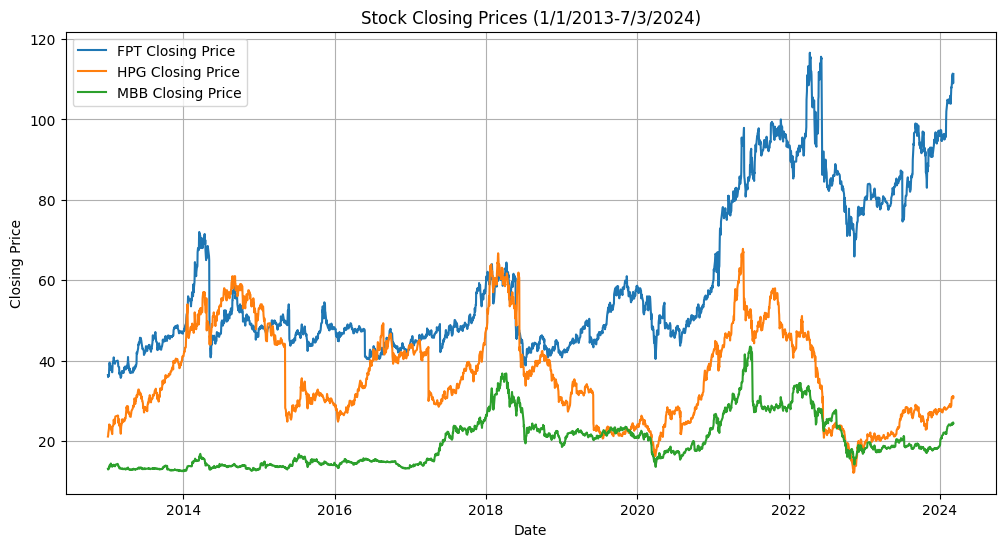

In [17]:
stock_symbols = ['FPT', 'HPG', 'MBB']
stock_dataframes = [df_FPT2, df_HPG2, df_MBB2]
plot_stock_closing_prices(stock_symbols, stock_dataframes)

MOVING AVERAGE

In [18]:
def plot_moving_average(df, col_gia, col_ngay, ma1=50, ma2=200, stock_id=''):
    df_ma = df[[col_ngay, col_gia]].copy()
    df_ma['MA_Short'] = df_ma[col_gia].rolling(window=ma1, min_periods=1).mean()
    df_ma['MA_Long'] = df_ma[col_gia].rolling(window=ma2, min_periods=1).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df_ma[col_ngay], df_ma[col_gia], label='Giá cổ phiếu', alpha=0.5)
    plt.plot(df_ma[col_ngay], df_ma['MA_Short'], label=f'MA {ma1} days')
    plt.plot(df_ma[col_ngay], df_ma['MA_Long'], label=f'MA {ma2} days')

    plt.title(f'Đường Trung Bình Động (MA) - {stock_id}')
    plt.xlabel('Ngày giao dịch')
    plt.ylabel('Giá cổ phiếu')
    plt.legend()
    plt.grid(True)
    plt.show()


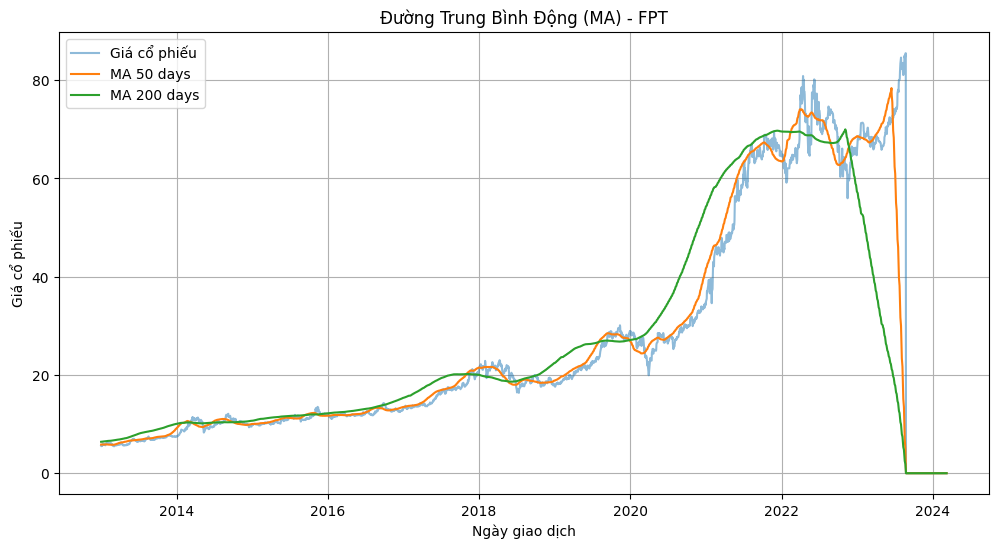

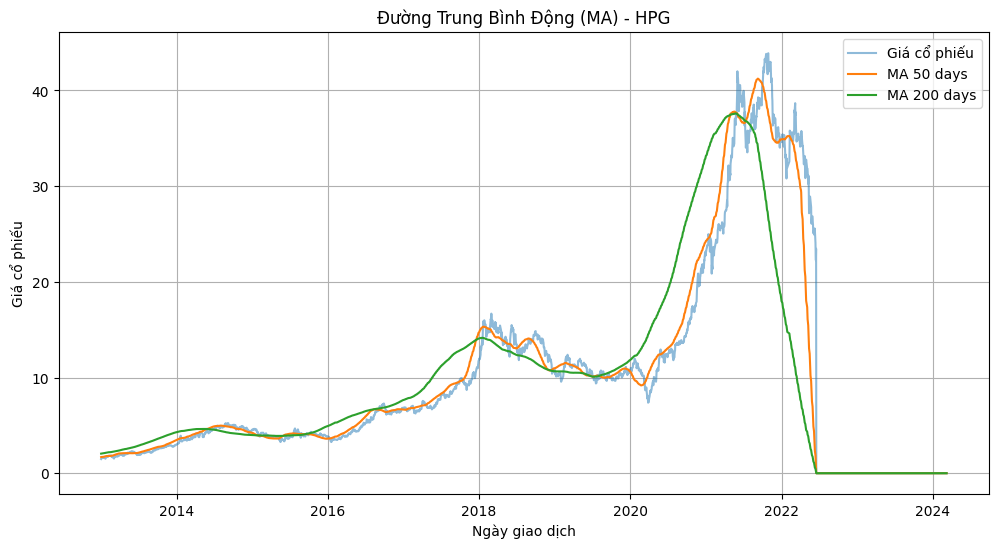

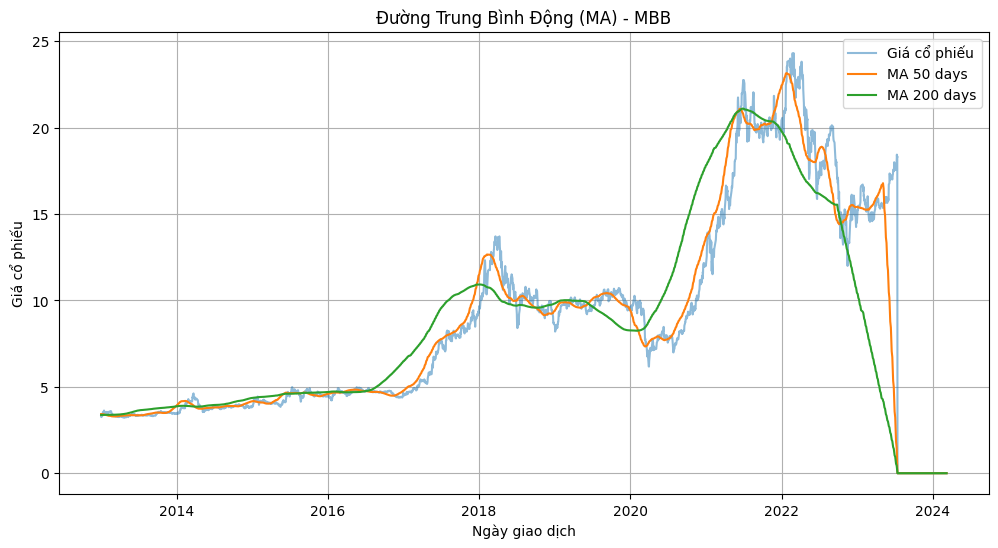

In [19]:
plot_moving_average(df_FPT2, 'Giá điều chỉnh', 'Ngày giao dịch', stock_id='FPT')
plot_moving_average(df_HPG2, 'Giá điều chỉnh', 'Ngày giao dịch', stock_id='HPG')
plot_moving_average(df_MBB2, 'Giá điều chỉnh', 'Ngày giao dịch', stock_id='MBB')

VOLUME ANALYSIS

In [20]:
def plot_volume(df, col_GDKL_KL, col_date, stock_id=''):
    plt.figure(figsize=(12, 6))
    plt.bar(df[col_date], df[col_GDKL_KL], color='blue', alpha=0.5)
    
    plt.title(f'Phân tích Khối lượng giao dịch - {stock_id}')
    plt.xlabel('Ngày giao dịch')
    plt.ylabel('Khối lượng giao dịch')
    plt.grid(True)
    plt.show()

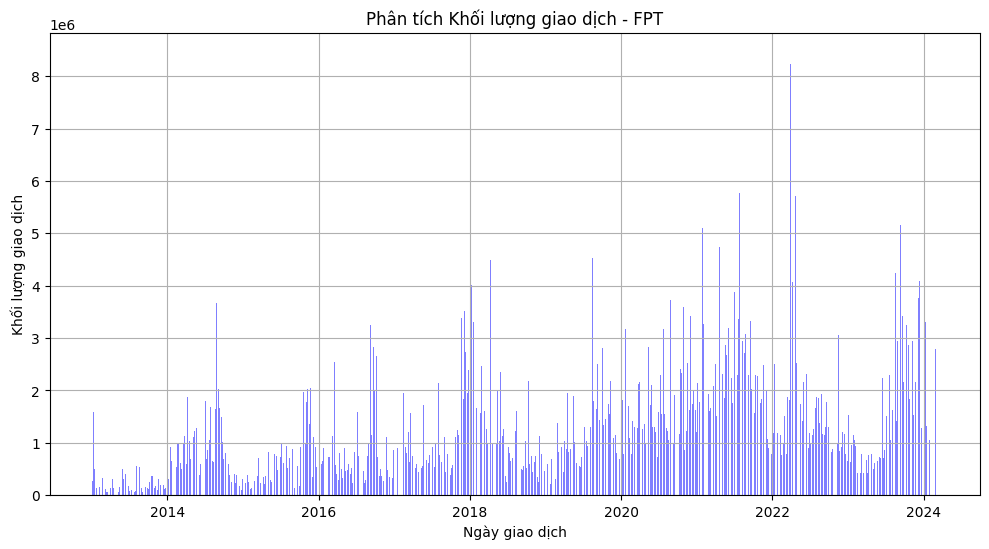

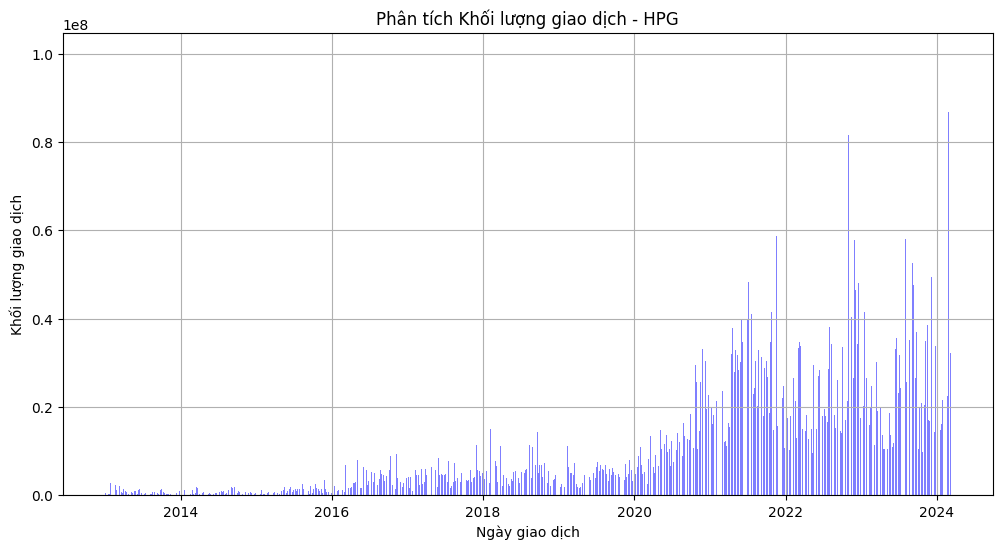

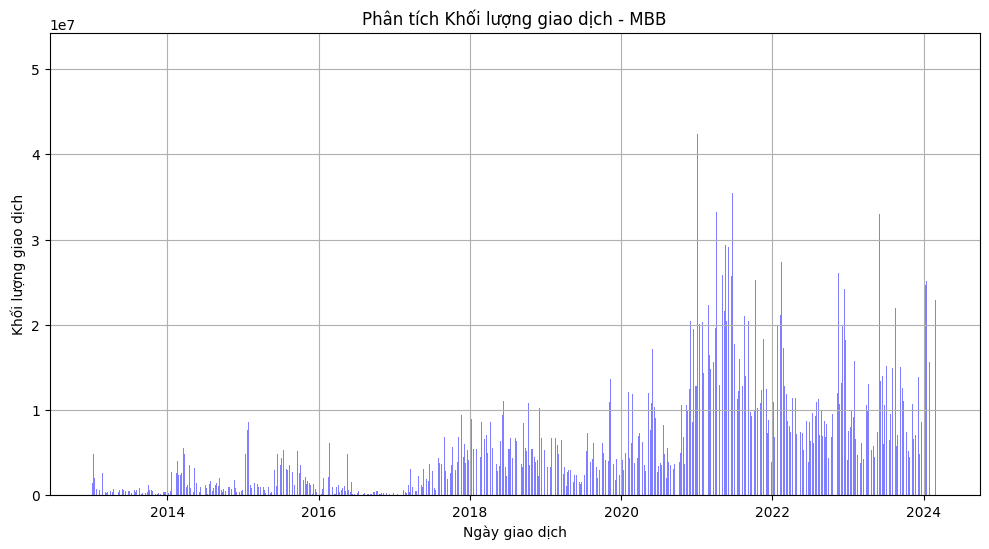

In [21]:
# Sử dụng hàm cho cổ phiếu FPT
plot_volume(df_FPT2, 'GDKL_KL', 'Ngày giao dịch', stock_id='FPT')
# Sử dụng hàm cho cổ phiếu HPG
plot_volume(df_HPG2, 'GDKL_KL', 'Ngày giao dịch', stock_id='HPG')
# Sử dụng hàm cho cổ phiếu MBB
plot_volume(df_MBB2, 'GDKL_KL', 'Ngày giao dịch', stock_id='MBB')

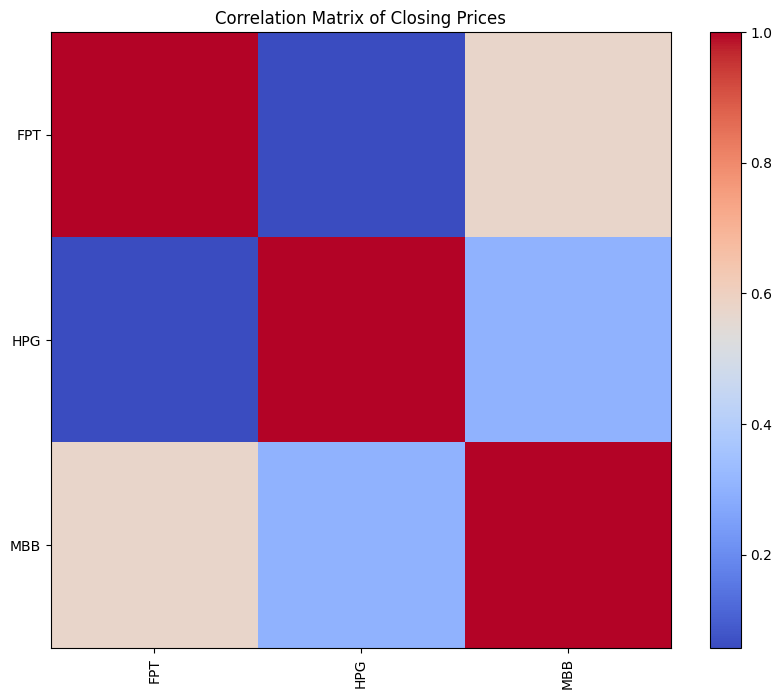

In [22]:
def plot_stock_correlation(*stock_dfs, stock_symbols=[]):
    # Combine DataFrames into a single DataFrame using the 'Ngày giao dịch' column as the index
    combined_df = pd.concat([df.set_index('Ngày giao dịch')['Giá đóng cửa'] for df in stock_dfs], axis=1, keys=stock_symbols)

    # Calculate the correlation matrix
    correlation_matrix = combined_df.corr()

    # Plot the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Correlation Matrix of Closing Prices')
    plt.show()

# Example usage
plot_stock_correlation(df_FPT2, df_HPG2, df_MBB2, stock_symbols=['FPT', 'HPG', 'MBB'])

Random Forest

In [23]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle

!pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


FPT

In [24]:
closedf_FPT2 = df_FPT2[['Ngày giao dịch','Giá đóng cửa']]
print("Shape of close dataframe:", closedf_FPT2.shape)
closedf_FPT2.head()

Shape of close dataframe: (2786, 2)


Ngày giao dịch  Giá đóng cửa
0 2024-03-07 00:00:00+00:00         111.3
1 2024-03-06 00:00:00+00:00         109.0
2 2024-03-05 00:00:00+00:00         110.7
3 2024-03-04 00:00:00+00:00         111.4
4 2024-03-01 00:00:00+00:00         110.8

In [25]:
closedf_FPT2_stock = closedf_FPT2.copy()
del closedf_FPT2['Ngày giao dịch']
scaler=MinMaxScaler(feature_range=(0,1))
closedf_FPT2=scaler.fit_transform(np.array(closedf_FPT2).reshape(-1,1))
print(closedf_FPT2.shape)

(2786, 1)


In [102]:
training_size=int(len(closedf_FPT2)*0.70)
test_size=len(closedf_FPT2)-training_size
train_data,test_data=closedf_FPT2[0:training_size,:],closedf_FPT2[training_size:len(closedf_FPT2),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1950, 1)
test_data:  (836, 1)


In [103]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [104]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1934, 15)
y_train:  (1934,)
X_test:  (820, 15)
y_test (820,)


Create new dataset according to requirement of time-series prediction

In [105]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [106]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1934, 1)
Test data prediction: (820, 1)


In [107]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [108]:
# Evaluation metrices RMSE and MAE
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.19987189137771832
Train data MSE:  0.039948772962906436
Test data MAE:  0.12375402817067081
-------------------------------------------------------------------------------------
Test data RMSE:  0.6300366424352936
Test data MSE:  0.3969461708111379
Test data MAE:  0.38136644306430717


Điểm phương sai được giải thích giải thích sự phân tán lỗi của một tập dữ liệu nhất định và công thức được viết như sau: Ở đây và Var(y) lần lượt là phương sai của lỗi dự đoán và giá trị thực tế. Điểm gần bằng 1 là rất được mong muốn, biểu thị bình phương độ lệch chuẩn của sai số tốt hơn.

In [109]:
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.999342678516337
Test data explained variance regression score: 0.9368773115233091


R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [110]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9993426710601887
Test data R2 score: 0.934839951891495


In [111]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  6.2303387218939e-05
Test data MGD:  0.0015425096002189705
----------------------------------------------------------------------
Train data MPD:  0.001497044663005847
Test data MPD:  0.02433034801872524


In [36]:
pip install nbformat==5.1.2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf_FPT2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf_FPT2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf_FPT2)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Ngày giao dịch': closedf_FPT2_stock['Ngày giao dịch'],
                       'Giá đóng cửa': closedf_FPT2_stock['Giá đóng cửa'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plot  = px.line(plotdf,x=plotdf['Ngày giao dịch'], y=[plotdf['Giá đóng cửa'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Ngày giao dịch': 'Date'})
plot .update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
plot .for_each_trace(lambda t:  t.update(name = next(names)))

plot .update_xaxes(showgrid=False)
plot .update_yaxes(showgrid=False)
plot .show()

Train predicted data:  (2786, 1)
Test predicted data:  (2786, 1)


Predicting next 10 days

In [113]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [114]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [115]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf_FPT2[len(closedf_FPT2)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction

In [116]:
rfdf_fpt_rf=closedf_FPT2.tolist()
rfdf_fpt_rf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf_fpt_rf=scaler.inverse_transform(rfdf_fpt_rf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

HPG

In [43]:
closedf_HPG2 = df_HPG2[['Ngày giao dịch','Giá đóng cửa']]
print("Shape of close dataframe:", closedf_HPG2.shape)
closedf_HPG2.head()

Shape of close dataframe: (2786, 2)


Ngày giao dịch  Giá đóng cửa
0 2024-03-07 00:00:00+00:00         31.00
1 2024-03-06 00:00:00+00:00         30.60
2 2024-03-05 00:00:00+00:00         31.15
3 2024-03-04 00:00:00+00:00         30.80
4 2024-03-01 00:00:00+00:00         30.85

In [44]:
closedf_HPG2_stock = closedf_HPG2.copy()
del closedf_HPG2['Ngày giao dịch']
scaler=MinMaxScaler(feature_range=(0,1))
closedf_HPG2=scaler.fit_transform(np.array(closedf_HPG2).reshape(-1,1))
print(closedf_HPG2.shape)

(2786, 1)


In [47]:
training_size_hpg=int(len(closedf_HPG2)*0.70)
test_size_hpg=len(closedf_HPG2)-training_size_hpg
train_data_hpg,test_data_hpg=closedf_FPT2[0:training_size_hpg,:],closedf_HPG2[training_size_hpg:len(closedf_HPG2),:1]
print("train_data: ", train_data_hpg.shape)
print("test_data: ", test_data_hpg.shape)

train_data:  (1950, 1)
test_data:  (836, 1)


In [48]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step_hpg = 15
X_train_hpg, y_train_hpg = create_dataset(train_data_hpg, time_step_hpg)
X_test_hpg, y_test_hpg = create_dataset(test_data_hpg, time_step_hpg)

print("X_train: ", X_train_hpg.shape)
print("y_train: ", y_train_hpg.shape)
print("X_test: ", X_test_hpg.shape)
print("y_test", y_test_hpg.shape)

X_train:  (1934, 15)
y_train:  (1934,)
X_test:  (820, 15)
y_test (820,)


In [49]:
from sklearn.ensemble import RandomForestRegressor

regressor_hpg = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_hpg.fit(X_train_hpg, y_train_hpg)

RandomForestRegressor(random_state=0)

In [50]:
# Lets Do the prediction 

train_predict_hpg=regressor_hpg.predict(X_train_hpg)
test_predict_hpg=regressor_hpg.predict(X_test_hpg)

train_predict_hpg = train_predict_hpg.reshape(-1,1)
test_predict_hpg = test_predict_hpg.reshape(-1,1)

print("Train data prediction:", train_predict_hpg.shape)
print("Test data prediction:", test_predict_hpg.shape)

Train data prediction: (1934, 1)
Test data prediction: (820, 1)


In [51]:
# Transform back to original form

train_predict_hpg = scaler.inverse_transform(train_predict_hpg)
test_predict_hpg = scaler.inverse_transform(test_predict_hpg)
original_ytrain_hpg = scaler.inverse_transform(y_train_hpg.reshape(-1,1)) 
original_ytest_hpg = scaler.inverse_transform(y_test_hpg.reshape(-1,1)) 

In [52]:
# Evaluation metrices RMSE and MAE
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_hpg,train_predict_hpg)))
print("Train data MSE: ", mean_squared_error(original_ytrain_hpg,train_predict_hpg))
print("Test data MAE: ", mean_absolute_error(original_ytrain_hpg,train_predict_hpg))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_hpg,test_predict_hpg)))
print("Test data MSE: ", mean_squared_error(original_ytest_hpg,test_predict_hpg))
print("Test data MAE: ", mean_absolute_error(original_ytest_hpg,test_predict_hpg))

Train data RMSE:  0.35970482551660465
Train data MSE:  0.129387561499931
Test data MAE:  0.2227172655607874
-------------------------------------------------------------------------------------
Test data RMSE:  1.2108619897273805
Test data MSE:  1.466186758166551
Test data MAE:  0.8324526357442191


In [53]:
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_hpg, train_predict_hpg))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_hpg, test_predict_hpg))

Train data explained variance regression score: 0.999342678516337
Test data explained variance regression score: 0.988901352961847


In [54]:
print("Train data R2 score:", r2_score(original_ytrain_hpg, train_predict_hpg))
print("Test data R2 score:", r2_score(original_ytest_hpg, test_predict_hpg))

Train data R2 score: 0.9993426710601887
Test data R2 score: 0.9885775653252933


In [55]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain_hpg, train_predict_hpg))
print("Test data MGD: ", mean_gamma_deviance(original_ytest_hpg, test_predict_hpg))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain_hpg, train_predict_hpg))
print("Test data MPD: ", mean_poisson_deviance(original_ytest_hpg, test_predict_hpg))

Train data MGD:  0.0001199198915636181
Test data MGD:  0.0010497260802787372
----------------------------------------------------------------------
Train data MPD:  0.003587451152010915
Test data MPD:  0.03790133527484937


In [76]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf_HPG2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_hpg)+look_back, :] = train_predict_hpg
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf_HPG2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_hpg)+(look_back*2)+1:len(closedf_HPG2)-1, :] = test_predict_hpg
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Ngày giao dịch': closedf_HPG2_stock['Ngày giao dịch'],
                       'Giá đóng cửa': closedf_HPG2_stock['Giá đóng cửa'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plot  = px.line(plotdf,x=plotdf['Ngày giao dịch'], y=[plotdf['Giá đóng cửa'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Ngày giao dịch': 'Date'})
plot .update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
plot .for_each_trace(lambda t:  t.update(name = next(names)))

plot .update_xaxes(showgrid=False)
plot .update_yaxes(showgrid=False)
plot .show()

Train predicted data:  (2786, 1)
Test predicted data:  (2786, 1)


In [59]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor_hpg.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor_hpg.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [60]:
last_days_hpg=np.arange(1,time_step+1)
day_pred_hpg=np.arange(time_step+1,time_step+pred_days+1)
print(last_days_hpg)
print(day_pred_hpg)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [61]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf_HPG2[len(closedf_HPG2)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [62]:
rfdf=closedf_HPG2.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

MBB

In [63]:
closedf_MBB2 = df_MBB2[['Ngày giao dịch','Giá đóng cửa']]
print("Shape of close dataframe:", closedf_MBB2.shape)
closedf_MBB2.head()

Shape of close dataframe: (2787, 2)


Ngày giao dịch  Giá đóng cửa
0 2024-03-07 00:00:00+00:00          24.4
1 2024-03-06 00:00:00+00:00          24.6
2 2024-03-05 00:00:00+00:00          24.6
3 2024-03-04 00:00:00+00:00          24.2
4 2024-03-01 00:00:00+00:00          24.0

In [64]:
closedf_MBB2_stock = closedf_MBB2.copy()
del closedf_MBB2['Ngày giao dịch']
scaler=MinMaxScaler(feature_range=(0,1))
closedf_MBB2=scaler.fit_transform(np.array(closedf_MBB2).reshape(-1,1))
print(closedf_MBB2.shape)

(2787, 1)


In [66]:
training_size_mbb=int(len(closedf_MBB2)*0.70)
test_size_mbb=len(closedf_MBB2)-training_size_mbb
train_data_mbb,test_data_mbb=closedf_MBB2[0:training_size_mbb,:],closedf_MBB2[training_size_mbb:len(closedf_MBB2),:1]
print("train_data: ", train_data_mbb.shape)
print("test_data: ", test_data_mbb.shape)

train_data:  (1950, 1)
test_data:  (837, 1)


In [67]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train_mbb, y_train_mbb = create_dataset(train_data_mbb, time_step)
X_test_mbb, y_test_mbb = create_dataset(test_data_mbb, time_step)

print("X_train: ", X_train_mbb.shape)
print("y_train: ", y_train_mbb.shape)
print("X_test: ", X_test_mbb.shape)
print("y_test", y_test_mbb.shape)

X_train:  (1934, 15)
y_train:  (1934,)
X_test:  (821, 15)
y_test (821,)


In [68]:
from sklearn.ensemble import RandomForestRegressor

regressor_mbb = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_mbb.fit(X_train_hpg, y_train_hpg)

RandomForestRegressor(random_state=0)

In [69]:
# Lets Do the prediction 

train_predict_mbb=regressor_mbb.predict(X_train_mbb)
test_predict_mbb=regressor_mbb.predict(X_test_mbb)

train_predict_mbb = train_predict_mbb.reshape(-1,1)
test_predict_mbb = test_predict_mbb.reshape(-1,1)

print("Train data prediction:", train_predict_mbb.shape)
print("Test data prediction:", test_predict_mbb.shape)

Train data prediction: (1934, 1)
Test data prediction: (821, 1)


In [70]:
# Transform back to original form

train_predict_mbb = scaler.inverse_transform(train_predict_mbb)
test_predict_mbb = scaler.inverse_transform(test_predict_mbb)
original_ytrain_mbb = scaler.inverse_transform(y_train_mbb.reshape(-1,1)) 
original_ytest_mbb = scaler.inverse_transform(y_test_mbb.reshape(-1,1)) 

In [71]:
# Evaluation metrices RMSE and MAE
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_mbb,train_predict_mbb)))
print("Train data MSE: ", mean_squared_error(original_ytrain_mbb,train_predict_mbb))
print("Test data MAE: ", mean_absolute_error(original_ytrain_mbb,train_predict_mbb))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_mbb,test_predict_mbb)))
print("Test data MSE: ", mean_squared_error(original_ytest_mbb,test_predict_mbb))
print("Test data MAE: ", mean_absolute_error(original_ytest_mbb,test_predict_mbb))

Train data RMSE:  0.7035239556522389
Train data MSE:  0.49494595617657344
Test data MAE:  0.4490871281651741
-------------------------------------------------------------------------------------
Test data RMSE:  1.2852437441551428
Test data MSE:  1.6518514818899301
Test data MAE:  1.0898586034999056


In [72]:
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_mbb, train_predict_mbb))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_mbb, test_predict_mbb))

Train data explained variance regression score: 0.9853200656554884
Test data explained variance regression score: 0.311652982794444


In [73]:
print("Train data R2 score:", r2_score(original_ytrain_mbb, train_predict_mbb))
print("Test data R2 score:", r2_score(original_ytest_mbb, test_predict_mbb))

Train data R2 score: 0.9853044967239966
Test data R2 score: -1.1344705732347018


In [74]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain_mbb, train_predict_mbb))
print("Test data MGD: ", mean_gamma_deviance(original_ytest_mbb, test_predict_mbb))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain_mbb, train_predict_mbb))
print("Test data MPD: ", mean_poisson_deviance(original_ytest_mbb, test_predict_mbb))

Train data MGD:  0.0009627843016228589
Test data MGD:  0.008081040431157972
----------------------------------------------------------------------
Train data MPD:  0.020720475015804953
Test data MPD:  0.11546472182579678


In [75]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf_MBB2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_hpg)+look_back, :] = train_predict_mbb
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf_MBB2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_mbb)+(look_back*2)+1:len(closedf_MBB2)-1, :] = test_predict_mbb
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Ngày giao dịch': closedf_MBB2_stock['Ngày giao dịch'],
                       'Giá đóng cửa': closedf_MBB2_stock['Giá đóng cửa'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plot  = px.line(plotdf,x=plotdf['Ngày giao dịch'], y=[plotdf['Giá đóng cửa'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Ngày giao dịch': 'Date'})
plot .update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
plot .for_each_trace(lambda t:  t.update(name = next(names)))

plot .update_xaxes(showgrid=False)
plot .update_yaxes(showgrid=False)
plot .show()

Train predicted data:  (2787, 1)
Test predicted data:  (2787, 1)


In [77]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor_mbb.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor_hpg.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [78]:
last_days_mbb=np.arange(1,time_step+1)
day_pred_mbb=np.arange(time_step+1,time_step+pred_days+1)
print(last_days_mbb)
print(day_pred_mbb)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [79]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf_MBB2[len(closedf_MBB2)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [80]:
rfdf=closedf_MBB2.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

LSTM

FPT

In [81]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100

31/31 [==============================] - 6s 19ms/step - loss: 0.0363
Epoch 2/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0024
Epoch 3/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 4/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 5/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 6/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 7/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0017
Epoch 8/100
31/31 [==============================] - 1s 16ms/step - loss: 0.0016
Epoch 9/100
31/31 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 10/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 11/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 12/100
31/31 [==============================] - 0s 16ms/step - loss: 0.0015
Epoch 13/100
31/31 [====

In [83]:
# Prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

26/26 [==============================] - 0s 6ms/step


In [84]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

In [85]:
# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain, train_predict)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest, test_predict)))

Train data RMSE:  0.5394514789072009
Test data RMSE:  0.43230844148968195


In [101]:
# Plotting
trainPredictPlot = np.empty_like(closedf_FPT2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict) + time_step, :] = train_predict

testPredictPlot = np.empty_like(closedf_FPT2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (time_step * 2) + 1:len(closedf_FPT2) - 1, :] = test_predict

names = cycle(['Original close price', 'Train predicted close price', 'Test predicted close price'])

# Create separate DataFrames for train and test predictions
train_plotdf = pd.DataFrame({
    'Ngày giao dịch': closedf_FPT2_stock['Ngày giao dịch'],
    'Giá đóng cửa': closedf_FPT2_stock['Giá đóng cửa'],
    'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
})

# Plotting
fig = px.line(train_plotdf, x='Ngày giao dịch', y=['Giá đóng cửa', 'train_predicted_close'],
              labels={'value': 'Stock price', 'Ngày giao dịch': 'Date'},
              title='Train: Original close price vs Predicted close price')

fig.add_scatter(x=test_plotdf['Ngày giao dịch'], y=test_plotdf['test_predicted_close'],
                mode='lines', name='Test predicted close price')

fig.update_layout(plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

HPG

In [90]:
model_hpg = Sequential()
model_hpg.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_hpg.shape[1], 1)))
model_hpg.add(LSTM(units=50, return_sequences=True))
model_hpg.add(LSTM(units=50))
model_hpg.add(Dense(units=1))
model_hpg.compile(optimizer='adam', loss='mean_squared_error')

In [91]:
history = model_hpg.fit(X_train_hpg, y_train_hpg, epochs=100, batch_size=64)

Epoch 1/100
31/31 [==============================] - 6s 17ms/step - loss: 0.0333
Epoch 2/100
31/31 [==============================] - 0s 16ms/step - loss: 0.0025
Epoch 3/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 4/100
31/31 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 5/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0019
Epoch 6/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 7/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 8/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 9/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 10/100
31/31 [==============================] - 1s 22ms/step - loss: 0.0016
Epoch 11/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0017
Epoch 12/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 13/100
31/31 [=====

In [92]:
# Prediction
train_predict_hpg = model_hpg.predict(X_train_hpg)
test_predict_hpg = model_hpg.predict(X_test_hpg)

26/26 [==============================] - 0s 7ms/step


In [93]:
# Transform back to original form
train_predict_hpg = scaler.inverse_transform(train_predict_hpg)
test_predict_hpg = scaler.inverse_transform(test_predict_hpg)
original_ytrain_hpg = scaler.inverse_transform(y_train_hpg.reshape(-1, 1))
original_ytest_hpg = scaler.inverse_transform(y_test_hpg.reshape(-1, 1))

In [94]:
# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_hpg, train_predict_hpg)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_hpg, test_predict_hpg)))

Train data RMSE:  0.6060664096927153
Test data RMSE:  0.6546233526787358


In [97]:
# Plotting
trainPredictPlot = np.empty_like(closedf_HPG2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict_hpg) + time_step, :] = train_predict_hpg

testPredictPlot = np.empty_like(closedf_HPG2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_hpg) + (time_step * 2) + 1:len(closedf_HPG2) - 1, :] = test_predict_hpg

names = cycle(['Original close price', 'Train predicted close price', 'Test predicted close price'])

# Create separate DataFrames for train and test predictions
train_plotdf = pd.DataFrame({
    'Ngày giao dịch': closedf_HPG2_stock['Ngày giao dịch'],
    'Giá đóng cửa': closedf_HPG2_stock['Giá đóng cửa'],
    'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
})

# Plotting
fig = px.line(train_plotdf, x='Ngày giao dịch', y=['Giá đóng cửa', 'train_predicted_close'],
              labels={'value': 'Stock price', 'Ngày giao dịch': 'Date'},
              title='Train: Original close price vs Predicted close price')

fig.add_scatter(x=test_plotdf['Ngày giao dịch'], y=test_plotdf['test_predicted_close'],
                mode='lines', name='Test predicted close price')

fig.update_layout(plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

MBB

In [ ]:
model_mbb = Sequential()
model_mbb.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_mbb.shape[1], 1)))
model_mbb.add(LSTM(units=50, return_sequences=True))
model_mbb.add(LSTM(units=50))
model_mbb.add(Dense(units=1))
model_mbb.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model_mbb.fit(X_train_mbb, y_train_mbb, epochs=100, batch_size=64)

In [ ]:
# Prediction
train_predict_mbb = model_mbb.predict(X_train_mbb)
test_predict_mbb = model_mbb.predict(X_test_mbb)

In [ ]:
# Transform back to original form
train_predict_mbb = scaler.inverse_transform(train_predict_mbb)
test_predict_mbb = scaler.inverse_transform(test_predict_mbb)
original_ytrain_mbb = scaler.inverse_transform(y_train_mbb.reshape(-1, 1))
original_ytest_mbb = scaler.inverse_transform(y_test_mbb.reshape(-1, 1))

In [ ]:
# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_mbb, train_predict_mbb)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_mbb, test_predict_mbb)))

In [99]:
# Plotting
trainPredictPlot = np.empty_like(closedf_MBB2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict_mbb) + time_step, :] = train_predict_mbb

testPredictPlot = np.empty_like(closedf_MBB2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_mbb) + (time_step * 2) + 1:len(closedf_MBB2) - 1, :] = test_predict_mbb

names = cycle(['Original close price', 'Train predicted close price', 'Test predicted close price'])

# Create separate DataFrames for train and test predictions
train_plotdf = pd.DataFrame({
    'Ngày giao dịch': closedf_MBB2_stock['Ngày giao dịch'],
    'Giá đóng cửa': closedf_MBB2_stock['Giá đóng cửa'],
    'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
})

# Plotting
fig = px.line(train_plotdf, x='Ngày giao dịch', y=['Giá đóng cửa', 'train_predicted_close'],
              labels={'value': 'Stock price', 'Ngày giao dịch': 'Date'},
              title='Train: Original close price vs Predicted close price')

fig.add_scatter(x=test_plotdf['Ngày giao dịch'], y=test_plotdf['test_predicted_close'],
                mode='lines', name='Test predicted close price')

fig.update_layout(plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()